# **ANALISIS DE VINOS**




# **LIMPIEZA DE DATOS**

---



**CARGA Y EXPLORAMIENTO  DE DATOS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url= 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR8ALBKCPYs-mBjjwy9ErP-gc6eBtOYVllyHtQjsaCGse4ihC0sjQmRVhOkQ9L73eQD2IOAUcmL-gKf/pub?output=csv'
dff = pd.read_csv(url)
dff.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,76.0,11.0,34.0,9.978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,98.0,25.0,67.0,9.968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,92.0,15.0,54.0,997.000,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,75.0,17.0,60.0,998.000,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,76.0,11.0,34.0,9.978,3.51,0.56,9.4,5


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   object 
 11  quality               1599 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 150.0+ KB


In [ ]:
dff.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,81.478684,0.270976,2.538806,77.470294,15.874922,46.467792,105.020292,3.311113,0.658149,5.636023
std,1.741096,227.799577,0.194801,1.409928,51.628973,10.460157,32.895324,217.248777,0.154386,0.169507,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.050000,1.000000,6.000000,1.000000,2.740000,0.330000,3.000000
25%,7.100000,0.400000,0.090000,1.900000,65.000000,7.000000,22.000000,9.971000,3.210000,0.550000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,77.000000,14.000000,38.000000,99.346000,3.310000,0.620000,6.000000
75%,9.200000,0.660000,0.420000,2.600000,88.000000,21.000000,62.000000,99.638000,3.400000,0.730000,6.000000
max,15.900000,975.000000,1.000000,15.500000,611.000000,72.000000,289.000000,999.000000,4.010000,2.000000,8.000000


**DATOS NULOS, DUPLICATOS Y ATIPICOS**

In [ ]:
dff.isna().sum() #nulos

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
dff.duplicated().sum() #duplicados

240

In [ ]:
df = dff.drop_duplicates() #eliminar duplicados
df.duplicated().sum()

0


*   ALCOHOL


In [ ]:
df['alcohol'].unique() #se observa valores inusuales que no pertenecen al grado de alcohol

array(['9.4', '9.8', '10', '9.5', '10.5', '9.2', '9.9', '9.1', '9.3', '9',
       '9.7', '10.1', '10.6', '9.6', '10.8', '10.3', '13.1', '10.2',
       '10.9', '10.7', '12.9', '10.4', '13', '14', '11.5', '11.4', '12.4',
       '11', '12.2', '12.8', '12.6', '12.5', '11.7', '11.3', '12.3', '12',
       '11.9', '11.8', '8.7', '13.3', '11.2', '11.6', '11.1', '13.4',
       '12.1', '8.4', '12.7', '14.9', '13.2', '13.6', '13.5',
       '100.333.333.333.333', '9.55', '8.5', '110.666.666.666.667',
       '956.666.666.666.667', '10.55', '8.8', '135.666.666.666.667',
       '11.95', '9.95', '923.333.333.333.333', '9.25', '09.05', '10.75'],
      dtype=object)

In [ ]:
#Filtro valors atipicos de alcohol para observar cuantos datos y como esta conformada esa data
alcohol = df[
    (df['alcohol'] == '100.333.333.333.333') |
    (df['alcohol'] == '110.666.666.666.667') |
    (df['alcohol'] == '956.666.666.666.667') |
    (df['alcohol'] == '135.666.666.666.667') |
    (df['alcohol'] == '923.333.333.333.333')
]
alcohol

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1359,11.6,475.00,0.40,1.4,91.0,6.0,28.0,99.704,3.07,0.65,100.333.333.333.333,6
1439,7.3,0.67,0.02,2.2,72.0,31.0,92.0,99.566,3.32,0.68,110.666.666.666.667,6
1441,7.4,785.00,0.19,5.2,94.0,19.0,98.0,99.713,3.16,0.52,956.666.666.666.667,6
1475,5.3,0.47,0.11,2.2,48.0,16.0,89.0,99.182,3.54,0.88,135.666.666.666.667,7
1514,6.9,0.84,0.21,4.1,74.0,16.0,65.0,99.842,3.53,0.72,923.333.333.333.333,6


In [ ]:
#ELIMINAR VALROES ATIPICOS
df = df.drop(alcohol.index)
df['alcohol'].unique()

array(['9.4', '9.8', '10', '9.5', '10.5', '9.2', '9.9', '9.1', '9.3', '9',
       '9.7', '10.1', '10.6', '9.6', '10.8', '10.3', '13.1', '10.2',
       '10.9', '10.7', '12.9', '10.4', '13', '14', '11.5', '11.4', '12.4',
       '11', '12.2', '12.8', '12.6', '12.5', '11.7', '11.3', '12.3', '12',
       '11.9', '11.8', '8.7', '13.3', '11.2', '11.6', '11.1', '13.4',
       '12.1', '8.4', '12.7', '14.9', '13.2', '13.6', '13.5', '9.55',
       '8.5', '10.55', '8.8', '11.95', '9.95', '9.25', '09.05', '10.75'],
      dtype=object)

In [ ]:
#Transformar los datos
df['alcohol']=df['alcohol'].astype(float)

**GRAFICOS DE VALORES ATIPICOS**

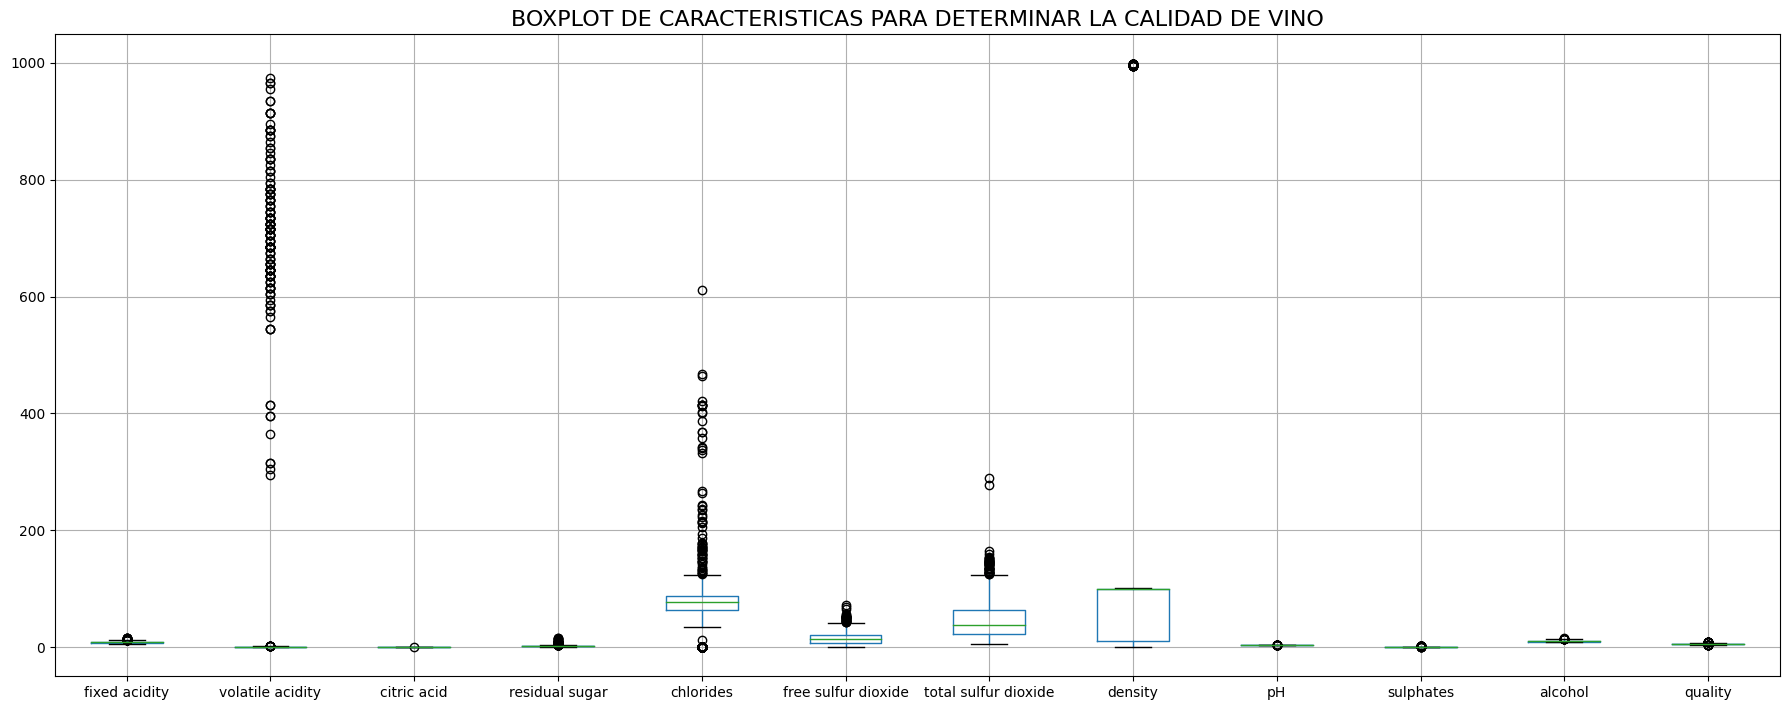

In [ ]:
#GRAFICAR CARACTERISTICAS
df.boxplot(figsize = (18,8))
plt.title('BOXPLOT DE CARACTERISTICAS PARA DETERMINAR LA CALIDAD DE VINO', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.show()
print('\nSe observa una gran predominancia de valores atipicos en 5 columnas:')
print('volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide y density')


Se observa una gran predominancia de valores atipicos en 5 columnas:
volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide y density


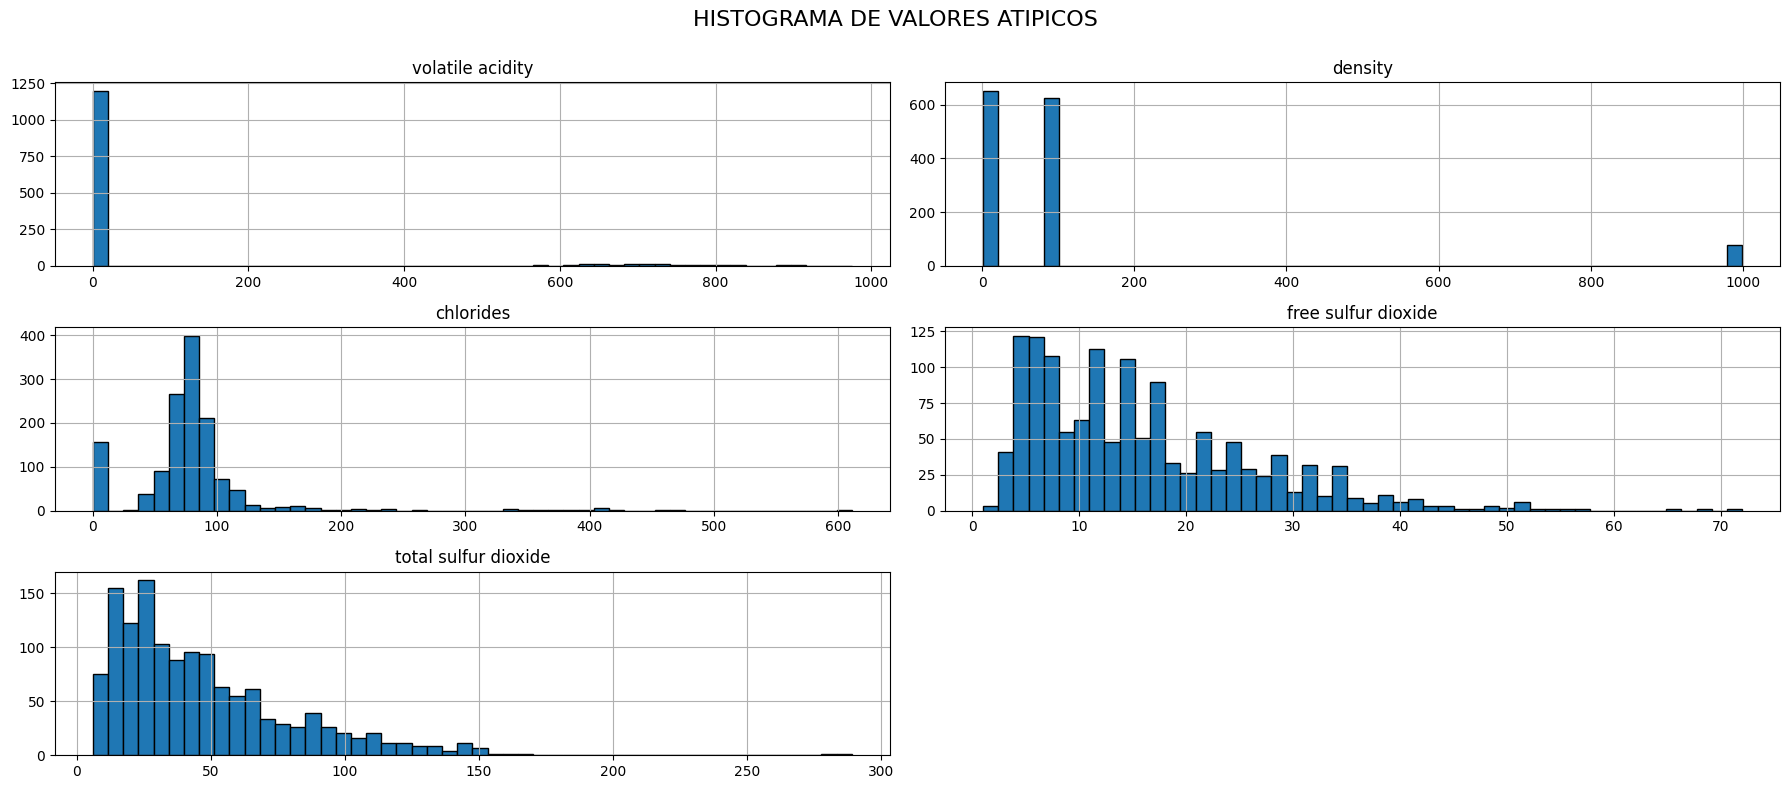


Se observa en todas las columnas una gran FRECUENCIA por valores pequeños
Claramente mientras mas alto sea el valor mas se aleja de su poblacion comun


In [ ]:
#GRAFICAR VALORES ATIPICOS
atipico = df[['volatile acidity', 'density','chlorides', 'free sulfur dioxide', 'total sulfur dioxide']]
atipico.hist(bins=50, figsize=(18, 8), edgecolor='black')
plt.suptitle('HISTOGRAMA DE VALORES ATIPICOS', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
print('\nSe observa en todas las columnas una gran FRECUENCIA por valores pequeños')
print('Claramente mientras mas alto sea el valor mas se aleja de su poblacion comun')

**LITERATURA COLUMNAS ATIPICAS**

*   DIOXIDO DE AZUFRE LIBRE
*   DIOXIDO DE AZUFRE TOTAL

*Los valores de dióxido de azufre libre (36-72 mg/dm³) y dióxido de azufre total (151-290 mg/dm³) que mencionas son realistas y comunes en el vino tinto, incluido el "Vinho Verde". El rango de dióxido de azufre total es adecuado para garantizar la estabilidad y la calidad del vino durante su vida útil, mientras que el dióxido de azufre libre está en un nivel suficiente para proteger el vino contra la oxidación y otros problemas.*
*FUENTE : CHATGPT*


*   DENSIDAD

*99 g/cm³: Esta densidad también es inusualmente alta e irreal para un vino. Los vinos suelen tener una densidad cercana a la del agua, alrededor de 0.99 a 1.01 g/cm³, dependiendo de su contenido de alcohol y azúcar.*

*   ACIDEZ VOLATIL

*Un valor de 900 g/dm³ (equivalente a 900 g/L) es extremadamente alto y poco realista en cualquier vino.
Los valores reales deberían estar mucho más bajos, típicamente en el rango de 0.3 a 1.0 g/L para mantener la calidad del vino.*



*   CLORUROS

*Tener cloruros en el rango de 62 a 90 g/dm³ en el vino tinto portugués "Vinho Verde" no es posible ni realista. Los niveles reales de cloruros en el vino deberían estar mucho más bajos, generalmente en el rango de 0.1 a 1.0 g/dm³*


*FUENTE: CHATGPT*

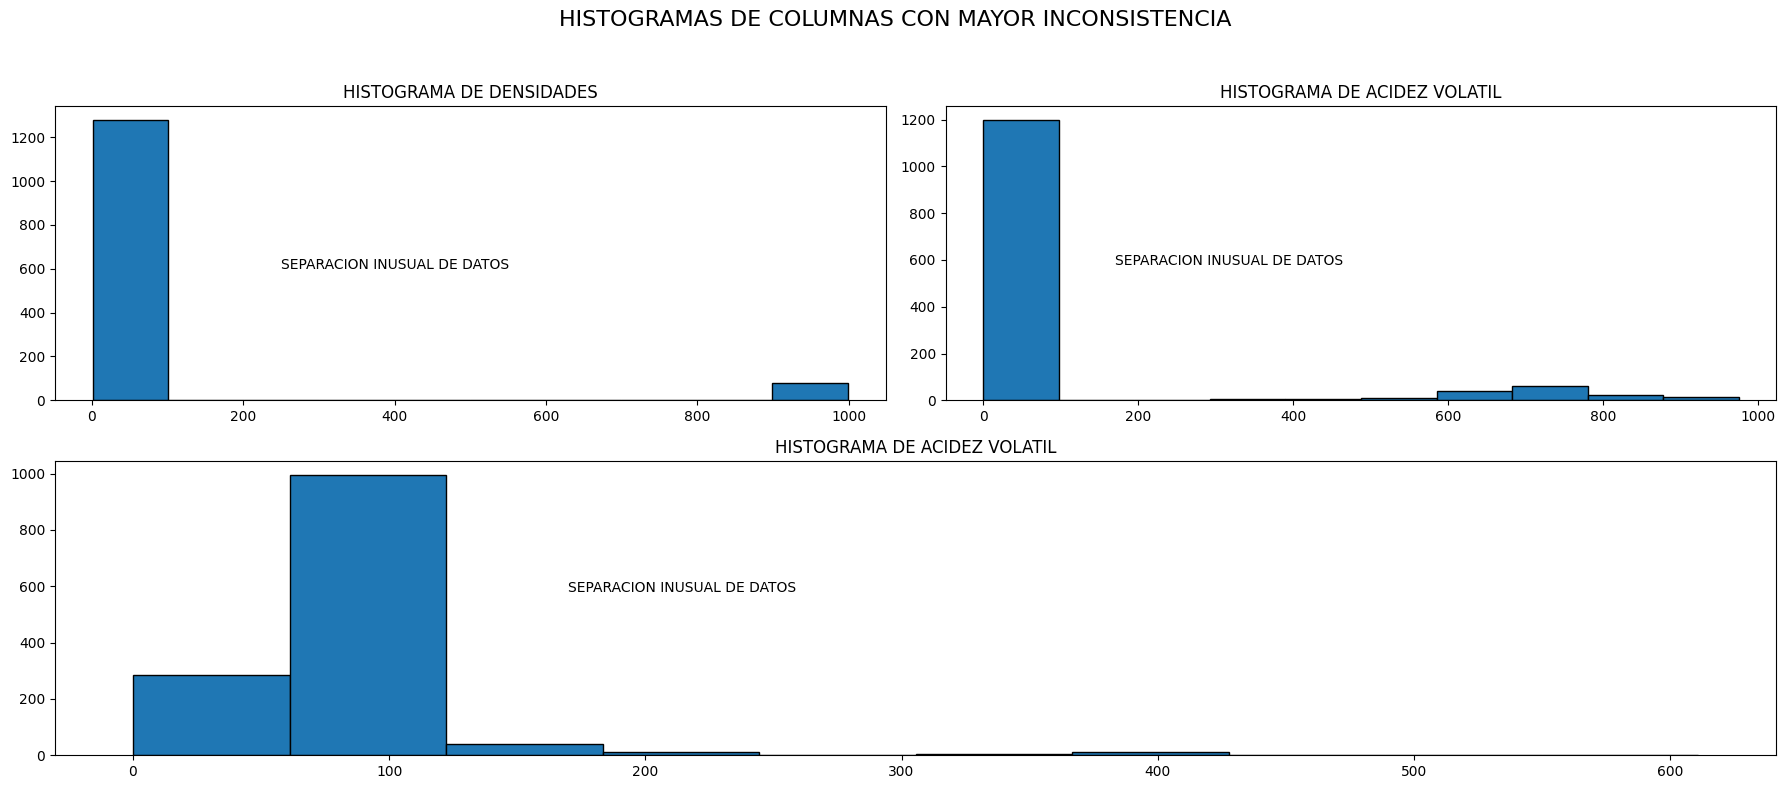


Grafico 3 columnas donde segun la literatura investigada tenemos valores que se escapan de lo real.
Tambien se aprecia un distanciamiento significativo entre valores minimos y maximos


In [ ]:
figura = plt.figure(figsize=(18,8), dpi=100)
plt.suptitle('HISTOGRAMAS DE COLUMNAS CON MAYOR INCONSISTENCIA', fontsize=16)

plt.subplot(2,2,1)
plt.title('HISTOGRAMA DE DENSIDADES')
plt.hist(df['density'], edgecolor='black')
plt.annotate('SEPARACION INUSUAL DE DATOS', xy=(250,600))

plt.subplot(2,2,2)
plt.title('HISTOGRAMA DE ACIDEZ VOLATIL')
plt.hist(df['volatile acidity'],edgecolor='black')
plt.annotate('SEPARACION INUSUAL DE DATOS', xy=(170,580))

plt.subplot(2,2,(3,4))
plt.title('HISTOGRAMA DE ACIDEZ VOLATIL')
plt.hist(df['chlorides'],edgecolor='black')
plt.annotate('SEPARACION INUSUAL DE DATOS', xy=(170,580))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
print('\nGrafico 3 columnas donde segun la literatura investigada tenemos valores que se escapan de lo real.')
print('Tambien se aprecia un distanciamiento significativo entre valores minimos y maximos')

In [ ]:
#ANALIZAMOS LA DISTRIBUCION DE LOS DATOS INUSUALES EN EL TOTAL DEL DATASET
densidad = df[df['density']>1.01]   #1338 = 98%
acida= df[df['fixed acidity']>1.2]  #1354 = 100%
cloro=df[df['chlorides']>1]         #1199 = 88%
print('*1338 filas  de densidad = 98% de la data')
print(densidad.shape)
print('*1354 de acidez volatil=100% de la data')
print(acida.shape)
print('*1199 cloro = 88% de la data')
print(cloro.shape)
print('\nLa idea de elimanr filas esta descartada, ya que atacaria la calidad de mis datos')
print('Lo mas sensato seria eliminar las columnas')
print('  1. Porque la densidad TIENE RELACION CON EL AZUCAR Y ALCOHOL, esas columnas las tengo, asi que densidad no es tan relevante')
print('  2. No puedo reemplazar por ninguna medida estadistica los valore, ya que hacerlo haria un desvalance notorio en mi data, ')

*1338 filas  de densidad = 98% de la data
(1338, 12)
*1354 de acidez volatil=100% de la data
(1354, 12)
*1199 cloro = 88% de la data
(1199, 12)

La idea de elimanr filas esta descartada, ya que atacaria la calidad de mis datos
Lo mas sensato seria eliminar las columnas
  1. Porque la densidad TIENE RELACION CON EL AZUCAR Y ALCOHOL, esas columnas las tengo, asi que densidad no es tan relevante
  2. No puedo reemplazar por ninguna medida estadistica los valore, ya que hacerlo haria un desvalance notorio en mi data, 


In [ ]:
#ELIMINAR LA COLUMNAS ATIPICAS
df =df.drop(columns='density',axis=1)
df =df.drop(columns='volatile acidity',axis=1)
df =df.drop(columns='chlorides',axis=1)

In [ ]:
df.describe()

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
count,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000
mean,8.312851,0.272651,2.521566,15.887001,46.724151,3.309734,0.658589,10.431352,5.621123
std,1.735150,0.195676,1.351772,10.454693,33.391729,0.154890,0.170825,1.079768,0.823992
min,4.600000,0.000000,0.900000,1.000000,6.000000,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.090000,1.900000,7.000000,22.000000,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.260000,2.200000,14.000000,38.000000,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.430000,2.600000,21.000000,63.000000,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.000000,15.500000,72.000000,289.000000,4.010000,2.000000,14.900000,8.000000


# **EXPLORACION DE DATOS**

---



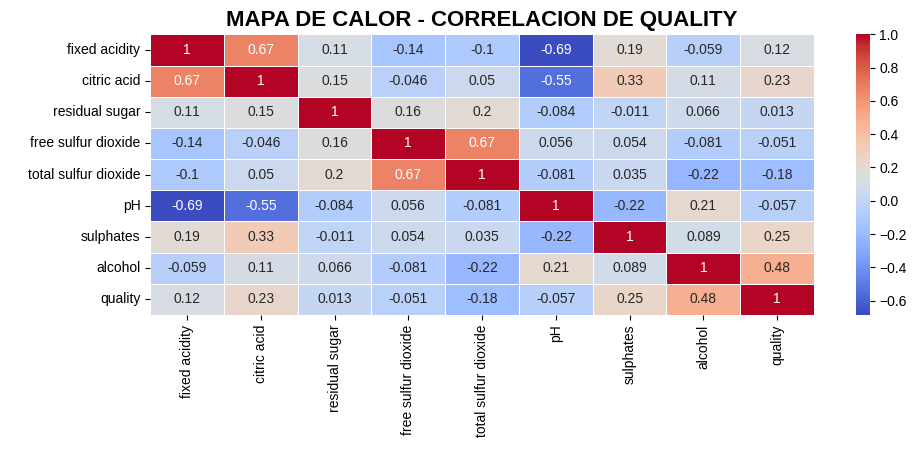


Se aprecia una correlacion de QUALITY con alcohol en mayor porcentaje
Correlacion menor : sulphates y citric_acid
No se observa un regresion lineal marcada en los datos


In [ ]:
#BUSCAR LA CORRELACION DE LOS DATOS
corr = df.corr()
figura = plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.style.use('seaborn-v0_8-whitegrid')
plt.title('MAPA DE CALOR - CORRELACION DE QUALITY', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
print('\nSe aprecia una correlacion de QUALITY con alcohol en mayor porcentaje')
print('Correlacion menor : sulphates y citric_acid')
print('No se observa un regresion lineal marcada en los datos')

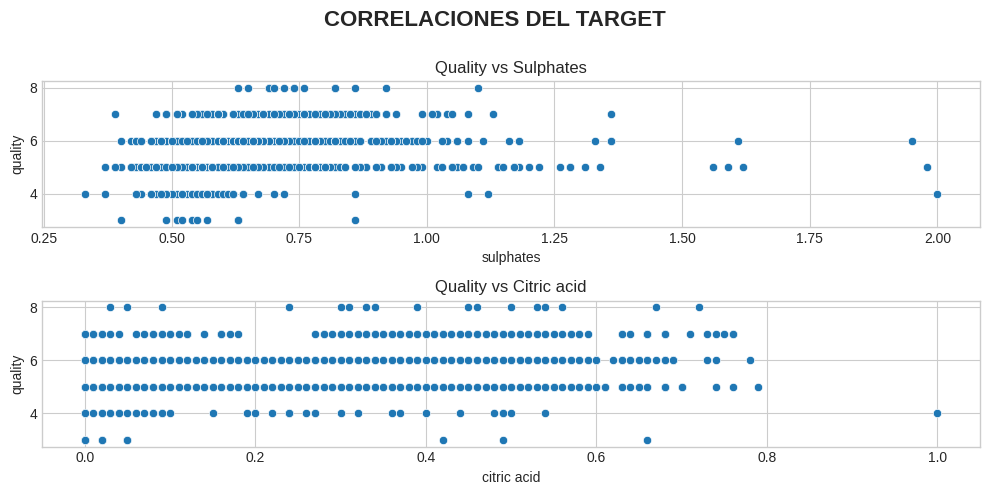


Se observa cierta relacion directamente proporcional el los grafico


In [ ]:
#GRAFICAR VALORES DE CORRELACION MAYOR
fig, axs = plt.subplots(2,1, figsize=(10,5), dpi=100)
plt.style.use('_mpl-gallery')
plt.suptitle('CORRELACIONES DEL TARGET', fontsize=16, fontweight='bold')

#grafico de dispersion
sns.scatterplot(data=df, y='quality', x='sulphates', ax=axs[0])
axs[0].set_title('Quality vs Sulphates')

sns.scatterplot(data=df, y='quality', x='citric acid', ax=axs[1])
axs[1].set_title('Quality vs Citric acid')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
print('\nSe observa cierta relacion directamente proporcional el los grafico')

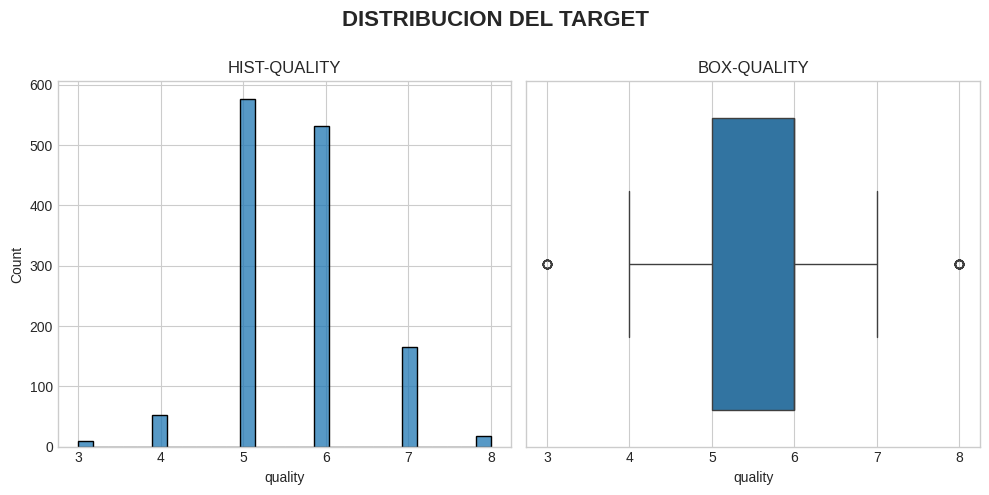


Se observa claramente una distribucion mayor en las categorias 5 y 6
No existe un balance equitativo


In [ ]:
#DISTRIBUCION DEL TARGET
fig, axs = plt.subplots(1,2, figsize=(10,5), dpi=100)
plt.style.use('_mpl-gallery')
plt.suptitle('DISTRIBUCION DEL TARGET', fontsize=16, fontweight='bold')

#grafico de dispersion
sns.histplot(data=df, x='quality', ax=axs[0])
axs[0].set_title('HIST-QUALITY')

sns.boxplot(data=df, x='quality', ax=axs[1])
axs[1].set_title('BOX-QUALITY')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
print('\nSe observa claramente una distribucion mayor en las categorias 5 y 6')
print('No existe un balance equitativo')

# **CONCLUSIONES**


Despues de lo investigado

No se observa ningun tipo de correlacion entre los datospor ese motivo se consideraria apropiado aplicar un MODELO DE CLASIFICACION con el objetivo de predecir la puntuacion del vino en base a sus caracteristicas quimicas.
Optaria por un regresion logistica aplicando previamente un lazypredict para escoger entre los mejores modelos acompañado de una busqueda de los mejores hiperparametros y finalizando con la optimizacion del modelo.

Tambien podemos apreciar una distribucion desproporcional en el target, dando enfasis en 2 clases (5 y 6)